In [58]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

In [10]:
dataframe=pd.read_csv("IBM Attrition Data.csv")

In [11]:
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [12]:
names = dataframe.columns.values
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


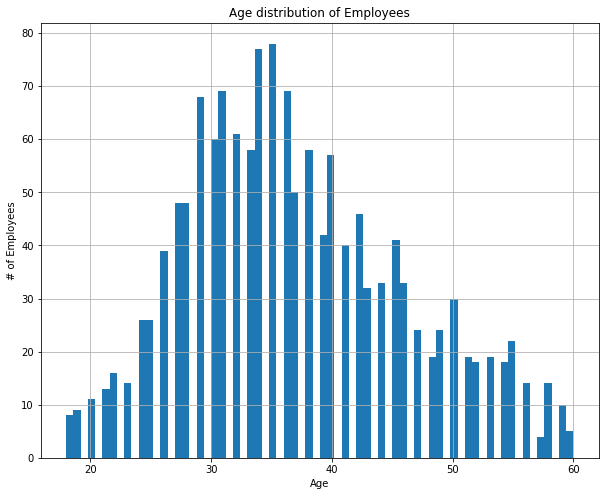

In [13]:
# histogram for age
plt.figure(figsize=(10,8))
dataframe['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


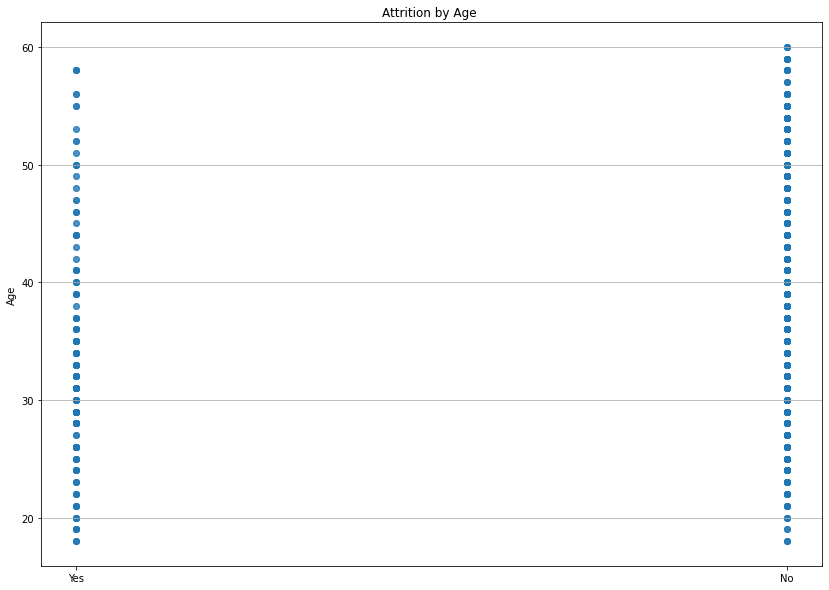

In [14]:
#attrition by age
plt.figure(figsize=(14,10))
plt.scatter(dataframe.Attrition,dataframe.Age, alpha=.55)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

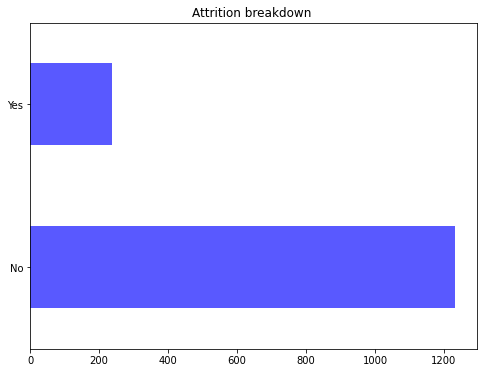

In [15]:
#Explore data for left employees
plt.figure(figsize=(8,6))
dataframe.Attrition.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title("Attrition breakdown ")
plt.show()

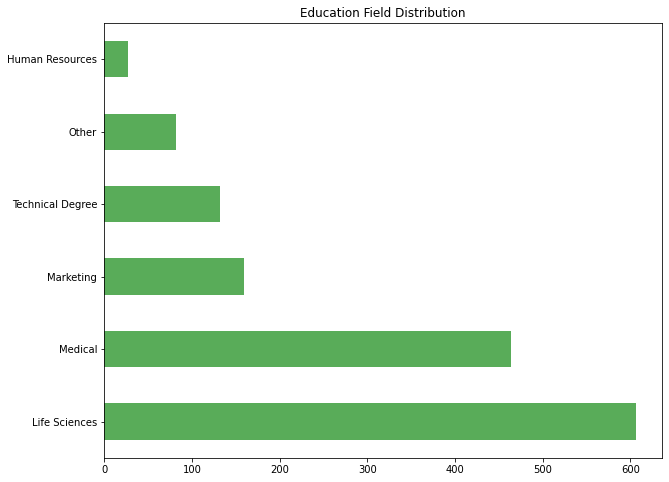

In [16]:
#explore the data from education distribution
plt.figure(figsize=(10,8))
dataframe.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.show()

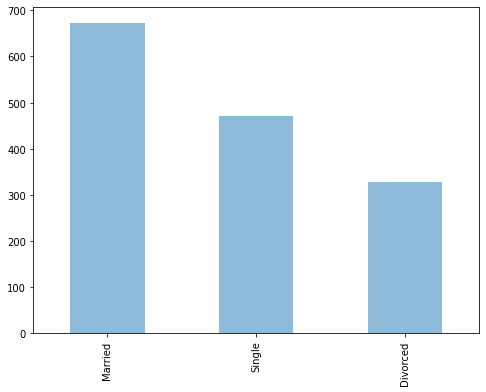

In [19]:
# explore data for Marital Status
plt.figure(figsize=(8,6))
dataframe.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
plt.show()

In [21]:
dataframe.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [22]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [24]:
dataframe.std()

Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [26]:
dataframe['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [28]:
dataframe['Attrition'].dtype

dtype('O')

In [29]:
dataframe['Attrition'].replace('Yes',1, inplace=True)
dataframe['Attrition'].replace('No',0, inplace=True)

In [32]:
dataframe.head(10)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,0,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,0,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,0,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,0,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,0,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


In [33]:
# building up a logistic regression model
X = dataframe.drop(['Attrition'],axis=1)
X.head()
Y = dataframe['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [34]:
dataframe['EducationField'].replace('Life Sciences',1, inplace=True)
dataframe['EducationField'].replace('Medical',2, inplace=True)
dataframe['EducationField'].replace('Marketing', 3, inplace=True)
dataframe['EducationField'].replace('Other',4, inplace=True)
dataframe['EducationField'].replace('Technical Degree',5, inplace=True)
dataframe['EducationField'].replace('Human Resources', 6, inplace=True)

In [35]:
dataframe['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [36]:
dataframe['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [56]:
dataframe['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [39]:
x=dataframe.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [41]:
x.columns

Index(['Intercept', 'Department[T.Research & Development]',
       'Department[T.Sales]', 'Age', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')

In [44]:
y=dataframe['Attrition']

In [45]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [55]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  dataframe, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Department[T.Research & Development]',
       'Department[T.Sales]', 'Age', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [59]:
y=np.ravel(y)

In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

0.8394557823129252

In [64]:
y.mean()

0.16122448979591836

In [65]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [66]:
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [67]:
probs = model2.predict_proba(X_test)
print (probs)

[[0.84486995 0.15513005]
 [0.81781945 0.18218055]
 [0.70969833 0.29030167]
 [0.8333989  0.1666011 ]
 [0.74826432 0.25173568]
 [0.79886802 0.20113198]
 [0.83988517 0.16011483]
 [0.83799422 0.16200578]
 [0.96269517 0.03730483]
 [0.93887216 0.06112784]
 [0.95334151 0.04665849]
 [0.83675529 0.16324471]
 [0.87162644 0.12837356]
 [0.87448821 0.12551179]
 [0.89099737 0.10900263]
 [0.89534392 0.10465608]
 [0.89244733 0.10755267]
 [0.79857674 0.20142326]
 [0.79683689 0.20316311]
 [0.88468787 0.11531213]
 [0.7233093  0.2766907 ]
 [0.94914488 0.05085512]
 [0.873328   0.126672  ]
 [0.8239825  0.1760175 ]
 [0.56761923 0.43238077]
 [0.78254481 0.21745519]
 [0.92176696 0.07823304]
 [0.92419768 0.07580232]
 [0.65541899 0.34458101]
 [0.84903581 0.15096419]
 [0.87308215 0.12691785]
 [0.83227606 0.16772394]
 [0.86784892 0.13215108]
 [0.95838338 0.04161662]
 [0.84415026 0.15584974]
 [0.87387704 0.12612296]
 [0.89166726 0.10833274]
 [0.69540824 0.30459176]
 [0.89374993 0.10625007]
 [0.81544916 0.18455084]


In [68]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8435374149659864
0.6504428186368887


In [69]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [70]:
print (X_train)

      Intercept  Department[T.Research & Development]  Department[T.Sales]  \
338         1.0                                   0.0                  1.0   
363         1.0                                   0.0                  1.0   
759         1.0                                   0.0                  0.0   
793         1.0                                   1.0                  0.0   
581         1.0                                   1.0                  0.0   
...         ...                                   ...                  ...   
763         1.0                                   0.0                  1.0   
835         1.0                                   0.0                  0.0   
1216        1.0                                   0.0                  1.0   
559         1.0                                   1.0                  0.0   
684         1.0                                   0.0                  1.0   

       Age  DistanceFromHome  Education  EducationField  YearsA